2023-05-19    27.990944
2023-05-20    27.966072
2023-05-21    27.953005
2023-05-22    27.946282
2023-05-23    27.942496
2023-05-24    27.940078
2023-05-25    27.938347
2023-05-26    27.936990
2023-05-27    27.935854
2023-05-28    27.934851
2023-05-29    27.933931
2023-05-30    27.933064
2023-05-31    27.932229
2023-06-01    27.931416
2023-06-02    27.930616
2023-06-03    27.929824
2023-06-04    27.929039
2023-06-05    27.928257
2023-06-06    27.927479
2023-06-07    27.926702
2023-06-08    27.925927
2023-06-09    27.925154
2023-06-10    27.924382
2023-06-11    27.923611
2023-06-12    27.922841
2023-06-13    27.922072
2023-06-14    27.921304
2023-06-15    27.920537
2023-06-16    27.919771
2023-06-17    27.919006
Freq: D, Name: Lần cuối, dtype: float64


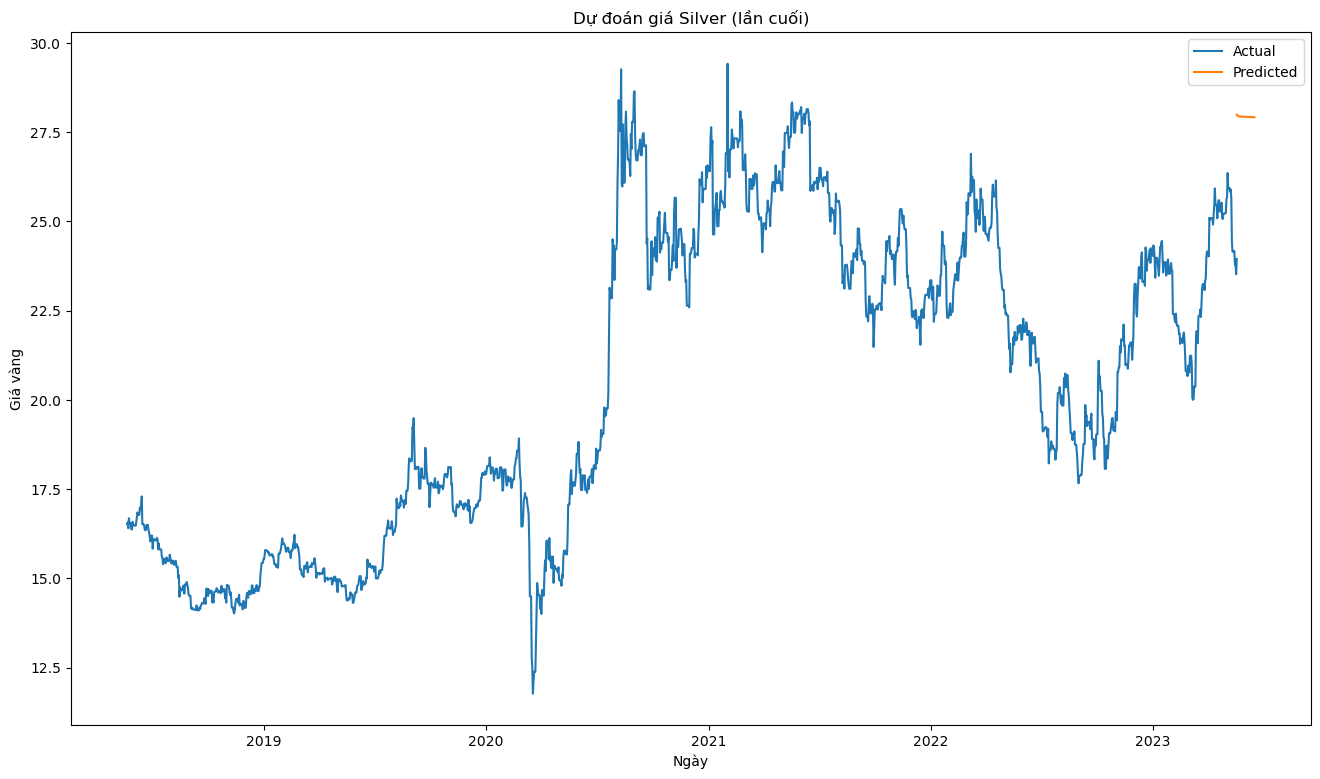

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_Silver = pd.read_csv("./data/SilverData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_Silver = data_Silver.drop('KL', axis=1)
data_Silver.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_Silver = data_Silver.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 6:3:1
train_size = int(len(data_Silver) * 0.6)
val_size = int(len(data_Silver) * 0.1)  # 10% dữ liệu cho tập validate
test_size = len(data_Silver) - train_size - val_size

train_data = data_Silver[:train_size].copy()
val_data = data_Silver[train_size:train_size+val_size].copy()
test_data = data_Silver[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_Silver.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_Silver.columns)
predicted_Silver_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_Silver_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_Silver.index, data_Silver['Lần cuối'], label='Actual')
plt.plot(predicted_Silver_prices.index, predicted_Silver_prices, label='Predicted')
plt.title('Dự đoán giá Silver (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

## Đánh giá mô hình

In [2]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_Silver_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_Silver_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_Silver_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 4.042943585332427
Root Mean Squared Error (RMSE): 4.042943585332427
Mean Absolute Percentage Error (MAPE): 16.882176320913757
